In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로딩

In [225]:
df = sns.load_dataset("penguins")

## 실습 하지 않는 컬럼 삭제

In [226]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [227]:
df = df.drop(['island', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex'], axis=1)

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         344 non-null    object 
 1   bill_length_mm  342 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.5+ KB


## 데이터 일부로 훼손

In [229]:
target_inddex = np.random.randint(344, size=10)
print(df.loc[target_inddex, "bill_length_mm"])
df.loc[target_inddex, "bill_length_mm"] = df.loc[target_inddex, "bill_length_mm"]*10.0
print(df.loc[target_inddex, "bill_length_mm"])

target_inddex = np.random.randint(344, size=5)
print(df.loc[target_inddex, "bill_length_mm"])
df.loc[target_inddex, "bill_length_mm"] = df.loc[target_inddex, "bill_length_mm"]*-1.0
print(df.loc[target_inddex, "bill_length_mm"])

154    51.3
237    49.2
95     40.8
48     36.0
89     38.9
150    36.0
101    41.0
276    43.8
52     35.0
217    49.6
Name: bill_length_mm, dtype: float64
154    513.0
237    492.0
95     408.0
48     360.0
89     389.0
150    360.0
101    410.0
276    438.0
52     350.0
217    496.0
Name: bill_length_mm, dtype: float64
177    52.0
261    49.6
259    48.7
307    51.3
287    49.5
Name: bill_length_mm, dtype: float64
177   -52.0
261   -49.6
259   -48.7
307   -51.3
287   -49.5
Name: bill_length_mm, dtype: float64


In [230]:
df

,species,bill_length_mm
0,Adelie,39.1
1,Adelie,39.5
2,Adelie,40.3
3,Adelie,NaN
4,Adelie,36.7
...,...,...
339,Gentoo,NaN
340,Gentoo,46.8
341,Gentoo,50.4
342,Gentoo,45.2


In [231]:
df.describe()

,bill_length_mm
count,342.000000
mean,53.548246
std,65.921043
min,-52.000000
25%,39.200000
50%,44.500000
75%,48.575000
max,513.000000


# 카테고리 데이터 인코딩

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         344 non-null    object 
 1   bill_length_mm  342 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.5+ KB


In [233]:
df.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [234]:
 df['species'].astype('category')
 print(df)

    species  bill_length_mm
0    Adelie            39.1
1    Adelie            39.5
2    Adelie            40.3
3    Adelie             NaN
4    Adelie            36.7
..      ...             ...
339  Gentoo             NaN
340  Gentoo            46.8
341  Gentoo            50.4
342  Gentoo            45.2
343  Gentoo            49.9

[344 rows x 2 columns]


In [235]:
df['species'] = df['species'].astype('category')

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   species         344 non-null    category
 1   bill_length_mm  342 non-null    float64 
dtypes: category(1), float64(1)
memory usage: 3.2 KB


In [237]:
df['species_code'] = df.species.cat.codes

In [238]:
df

,species,bill_length_mm,species_code
0,Adelie,39.1,0
1,Adelie,39.5,0
2,Adelie,40.3,0
3,Adelie,NaN,0
4,Adelie,36.7,0
...,...,...,...
339,Gentoo,NaN,2
340,Gentoo,46.8,2
341,Gentoo,50.4,2
342,Gentoo,45.2,2


```
 df['species'].astype('category')
 df['species_code'] = df.species.cat.codes
```

```
def encode_species(org):
  if org=="Adelie": return 0
  if org=="Gentoo": return 1
  if org=="Chinstrap": return 2
  return -1

df['sepecies_code'] = df.species.applymap(encode_species)
```

In [239]:
df.species.value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [240]:
df.loc[df.species.isnull()]

,species,bill_length_mm,species_code


# 데이터 살펴 보기

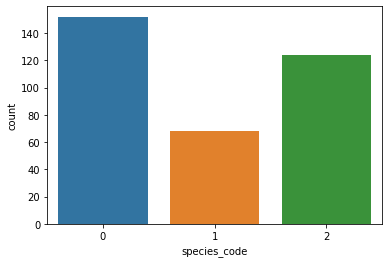

In [241]:
sns.countplot(data=df, x="species_code")
plt.show()

In [242]:
df.columns

Index(['species', 'bill_length_mm', 'species_code'], dtype='object')

# 이상치

## 이상치 보기

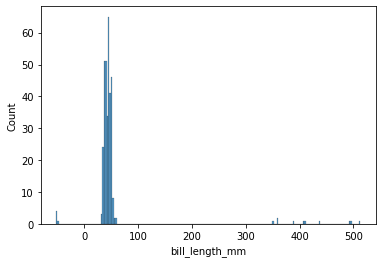

In [243]:
sns.histplot(data=df, x="bill_length_mm")

In [244]:
print(df.loc[(df.bill_length_mm<0.) | (df.bill_length_mm>100.), "bill_length_mm"])

48     360.0
52     350.0
89     389.0
95     408.0
101    410.0
150    360.0
154    513.0
177    -52.0
217    496.0
237    492.0
259    -48.7
261    -49.6
276    438.0
287    -49.5
307    -51.3
Name: bill_length_mm, dtype: float64


## 이상치 처리하기

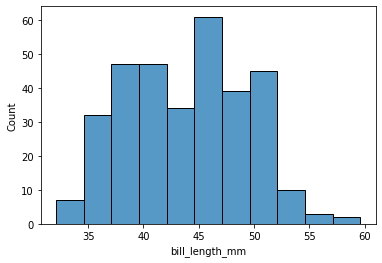

In [245]:
sns.histplot(df.loc[(df.bill_length_mm>=0.0) & (df.bill_length_mm<=100.), "bill_length_mm"])

In [246]:
min = df.loc[(df.bill_length_mm>=0.0) & (df.bill_length_mm<=100.), "bill_length_mm"].min()
max = df.loc[(df.bill_length_mm>=0.0) & (df.bill_length_mm<=100.), "bill_length_mm"].max()
print(min, max)

32.1 59.6


In [247]:
df.loc[df.bill_length_mm < 0.0, "bill_length_mm"] = min
df.loc[df.bill_length_mm > 100.0, "bill_length_mm"] = max

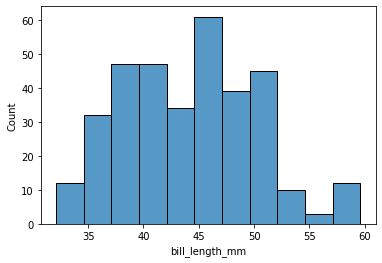

In [248]:
sns.histplot(df.bill_length_mm)

# 결측치

## 결측기 보기

In [249]:
df.isnull().any()

species           False
bill_length_mm     True
species_code      False
dtype: bool

In [250]:
df.isnull().sum()

species           0
bill_length_mm    2
species_code      0
dtype: int64

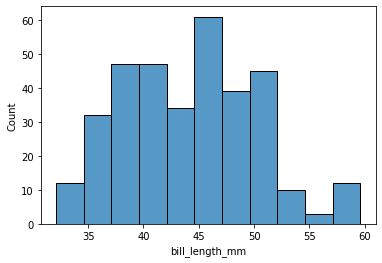

In [251]:
sns.histplot(data=df, x="bill_length_mm")

## 결측치 처리하기

In [252]:
working_df = df.fillna(df.mean())

In [253]:
working_df.isnull().sum()

species           0
bill_length_mm    0
species_code      0
dtype: int64

In [254]:
working_df

,species,bill_length_mm,species_code
0,Adelie,39.100000,0
1,Adelie,39.500000,0
2,Adelie,40.300000,0
3,Adelie,44.166959,0
4,Adelie,36.700000,0
...,...,...,...
339,Gentoo,44.166959,2
340,Gentoo,46.800000,2
341,Gentoo,50.400000,2
342,Gentoo,45.200000,2


# Normalarization

In [255]:
working_df.describe()

,bill_length_mm,species_code
count,344.000000,344.000000
mean,44.166959,0.918605
std,6.092445,0.893320
min,32.100000,0.000000
25%,39.200000,0.000000
50%,44.500000,1.000000
75%,48.525000,2.000000
max,59.600000,2.000000


In [256]:
working_df

,species,bill_length_mm,species_code
0,Adelie,39.100000,0
1,Adelie,39.500000,0
2,Adelie,40.300000,0
3,Adelie,44.166959,0
4,Adelie,36.700000,0
...,...,...,...
339,Gentoo,44.166959,2
340,Gentoo,46.800000,2
341,Gentoo,50.400000,2
342,Gentoo,45.200000,2


In [257]:
working_df = working_df.drop(["species"], axis=1)

In [258]:
working_df = ( working_df - working_df.min() ) / ( working_df.max() - working_df.min() )

In [259]:
working_df.describe()

,bill_length_mm,species_code
count,344.000000,344.000000
mean,0.438799,0.459302
std,0.221543,0.446660
min,0.000000,0.000000
25%,0.258182,0.000000
50%,0.450909,0.500000
75%,0.597273,1.000000
max,1.000000,1.000000


In [260]:
df['bill_length_mm_processed'] = working_df.bill_length_mm

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   species                   344 non-null    category
 1   bill_length_mm            342 non-null    float64 
 2   species_code              344 non-null    int8    
 3   bill_length_mm_processed  344 non-null    float64 
dtypes: category(1), float64(2), int8(1)
memory usage: 6.3 KB


In [262]:
df.describe()

,bill_length_mm,species_code,bill_length_mm_processed
count,342.000000,344.000000,344.000000
mean,44.166959,0.918605,0.438799
std,6.110286,0.893320,0.221543
min,32.100000,0.000000,0.000000
25%,39.200000,0.000000,0.258182
50%,44.500000,1.000000,0.450909
75%,48.575000,2.000000,0.597273
max,59.600000,2.000000,1.000000


In [263]:
df

,species,bill_length_mm,species_code,bill_length_mm_processed
0,Adelie,39.1,0,0.254545
1,Adelie,39.5,0,0.269091
2,Adelie,40.3,0,0.298182
3,Adelie,NaN,0,0.438799
4,Adelie,36.7,0,0.167273
...,...,...,...,...
339,Gentoo,NaN,2,0.438799
340,Gentoo,46.8,2,0.534545
341,Gentoo,50.4,2,0.665455
342,Gentoo,45.2,2,0.476364


# 마무리

In [264]:
df['species'] = df.species_code
df['bill_length_mm'] = df.bill_length_mm_processed

df.drop(["species_code", "bill_length_mm_processed"], axis=1, inplace=True)

In [265]:
df

,species,bill_length_mm
0,0,0.254545
1,0,0.269091
2,0,0.298182
3,0,0.438799
4,0,0.167273
...,...,...
339,2,0.438799
340,2,0.534545
341,2,0.665455
342,2,0.476364


In [266]:
df.describe()

,species,bill_length_mm
count,344.000000,344.000000
mean,0.918605,0.438799
std,0.893320,0.221543
min,0.000000,0.000000
25%,0.000000,0.258182
50%,1.000000,0.450909
75%,2.000000,0.597273
max,2.000000,1.000000


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         344 non-null    int8   
 1   bill_length_mm  344 non-null    float64
dtypes: float64(1), int8(1)
memory usage: 3.1 KB
